In [0]:
import pyspark.sql.functions as F
from pyspark.sql.functions import col
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession 

spark = (SparkSession.builder.appName("Spaceship Titanic").config('spark.sql.repl.eagerEval.enabled', True).getOrCreate())

In [0]:
df = spark.sql('select * from spaceship_titanic')
df = df.toPandas()

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float32
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float32
 8   FoodCourt     8510 non-null   float32
 9   ShoppingMall  8485 non-null   float32
 10  Spa           8510 non-null   float32
 11  VRDeck        8505 non-null   float32
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float32(6), object(7)
memory usage: 687.8+ KB


In [0]:
porc_nulos = (df.isnull().sum()/df.count()).sort_values(ascending = False) 
porc_nulos2 = porc_nulos.map(lambda x: "{:.2%}".format(x))
print(porc_nulos2)

CryoSleep       2.56%
ShoppingMall    2.45%
VIP             2.39%
HomePlanet      2.37%
Name            2.35%
Cabin           2.34%
VRDeck          2.21%
FoodCourt       2.15%
Spa             2.15%
Destination     2.14%
RoomService     2.13%
Age             2.10%
PassengerId     0.00%
Transported     0.00%
dtype: object


## Funções auxiliares: 

In [0]:
def graf_barras(variavel,df):
    df_aux = df.fillna('Sem Info').groupby(variavel, dropna = False).count().reset_index().sort_values(by='PassengerId')
    df_aux[variavel] = df_aux[variavel].astype(str)
    plt.bar(df_aux[variavel], df_aux['PassengerId'])
    plt.ylabel = 'Quantidade de Passageiros'
    plt.xlabel = variavel
    # plt.title('Quantidade de passageiros que elegeram ou não o CryoSleep')
    lista_qtd = df_aux['PassengerId'].tolist()

    for i, quantidade in enumerate(lista_qtd):    
        plt.annotate(str(quantidade), xy = (i, quantidade), ha = 'center', va = 'bottom')
    return plt.show()

In [0]:
def graf_stack(variavel, df):
    df_aux = df.fillna('Sem Info').groupby(variavel, dropna = False).count().reset_index().sort_values(by='PassengerId')
    valores = df_aux[[variavel, 'PassengerId']]
    valores['Porcentagem'] = (valores['PassengerId'] / valores['PassengerId'].sum())
    # valores['Porcentagem'] = valores['Porcentagem'].map(lambda x: '{:.2%}'.format(x))
    valores = valores[[variavel, 'Porcentagem']]
    fig, ax = plt.subplots()
    valores.set_index(variavel).T.plot(kind='bar', stacked=True, ax=ax)
    # plt.title('Porcentagem de passageiros que elegeram ou não o CryoSleep - Soma 100%')
    return plt.show()

## Análise Univariada

### CryoSleep
Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

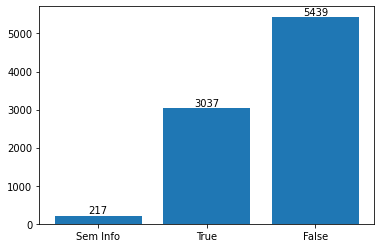

In [0]:
graf_barras('CryoSleep', df)
    

## VIP

<command-1201796995892757>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valores['Porcentagem'] = (valores['PassengerId'] / valores['PassengerId'].sum())


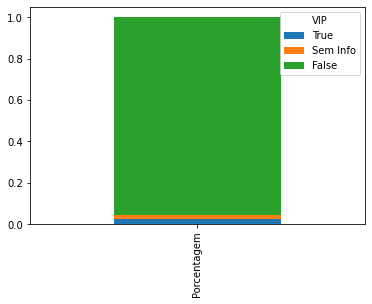

In [0]:
graf_stack('VIP', df)


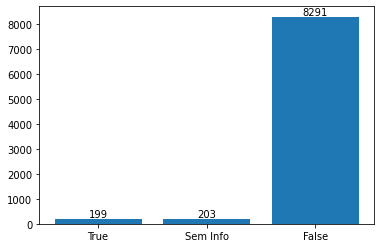

In [0]:
graf_barras('VIP',df)